In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we are working on a data set with a bunch of turmo and then a classification of wheather they are maligma or benign

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


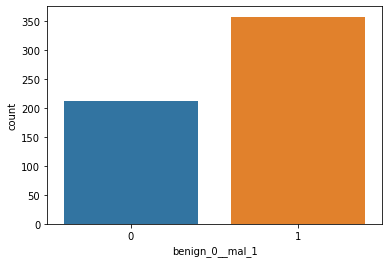

In [7]:
'''for classification class, it is a good idea to do count plot to see the number of instances per label'''
sns.countplot(x='benign_0__mal_1',data=df)

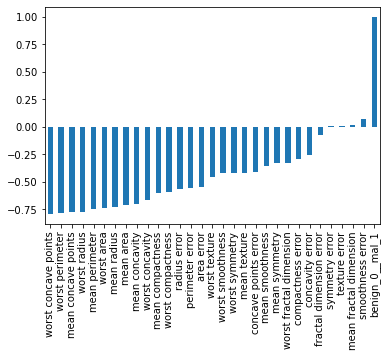

In [11]:
'''i will check out the correction between the features them self'''
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

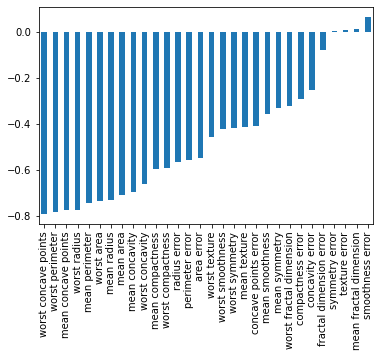

In [12]:
'''from the above we will see that the last one is perfectly corrolated so i will go drop it'''
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

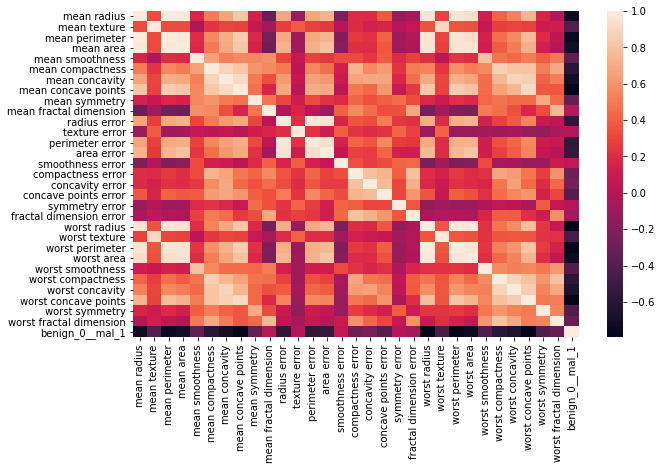

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [19]:
'''we will begin our train test split'''
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [26]:
'''in here i will scale the data'''
from sklearn.preprocessing import MinMaxScaler

In [22]:
'''in willl create an instance of this scaler'''
scaler = MinMaxScaler()

In [23]:
'''in here we will fit transform out training data'''
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test) #we do not want to fit the test data to avoid data leakage

In [32]:
'''in here i willl create model'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [30]:
'''i will create a very simple model'''
X_train.shape

(398, 30)

In [33]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [34]:
'''i will train the just created model'''
model.fit(x=X_train,y=y_train,batch_size=128, epochs=600,validation_data=(X_test,y_test))#we are training on x&y train and also checking along our x&y test

Epoch 1/600
4/4 [==============================] - 0s 39ms/step - loss: 0.6805 - val_loss: 0.6753
Epoch 2/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6713 - val_loss: 0.6679
Epoch 3/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6634 - val_loss: 0.6615
Epoch 4/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6562 - val_loss: 0.6553
Epoch 5/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6493 - val_loss: 0.6491
Epoch 6/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6425 - val_loss: 0.6427
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6354 - val_loss: 0.6355
Epoch 8/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6279 - val_loss: 0.6286
Epoch 9/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6204 - val_loss: 0.6206
Epoch 10/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6119 - val_loss: 0.6121
Epoch 11/600
4/4 [==========

4/4 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.1311
Epoch 168/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0511 - val_loss: 0.1334
Epoch 169/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1311
Epoch 170/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.1312
Epoch 171/600
4/4 [==============================] - ETA: 0s - loss: 0.045 - 0s 5ms/step - loss: 0.0498 - val_loss: 0.1320
Epoch 172/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1322
Epoch 173/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1290
Epoch 174/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0485 - val_loss: 0.1276
Epoch 175/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0490 - val_loss: 0.1271
Epoch 176/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0486 - val_loss: 0.1277


Epoch 332/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0352 - val_loss: 0.1344
Epoch 333/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0349 - val_loss: 0.1332
Epoch 334/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.1329
Epoch 335/600
4/4 [==============================] - 0s 11ms/step - loss: 0.0345 - val_loss: 0.1354
Epoch 336/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0339 - val_loss: 0.1353
Epoch 337/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1343
Epoch 338/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0337 - val_loss: 0.1366
Epoch 339/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.1368
Epoch 340/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.1351
Epoch 341/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.1344
Epoch 342

Epoch 497/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0281 - val_loss: 0.1472
Epoch 498/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.1475
Epoch 499/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1445
Epoch 500/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.1423
Epoch 501/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.1406
Epoch 502/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.1403
Epoch 503/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0280 - val_loss: 0.1401
Epoch 504/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0281 - val_loss: 0.1406
Epoch 505/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.1459
Epoch 506/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.1514
Epoch 507/

In [37]:
'''i will plot out the loss...i will be able to plot out the trainning loss and the validation loss'''
losses = pd.DataFrame(model.history.history)

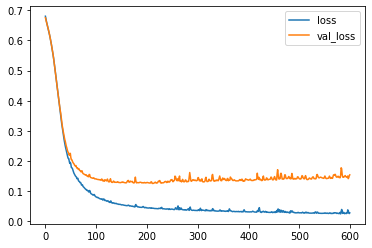

In [39]:
losses.plot()

In [40]:
'''we will try to stop the training base off our validation loss before it gets out of hand...we will use early stoping'''
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [43]:
'''we create an early stop variable'''
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [49]:
model.fit(x=X_train,y=y_train,batch_size=128, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
4/4 [==============================] - 0s 14ms/step - loss: 0.0336 - val_loss: 0.1374
Epoch 2/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.1364
Epoch 3/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0321 - val_loss: 0.1397
Epoch 4/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0333 - val_loss: 0.1406
Epoch 5/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0328 - val_loss: 0.1393
Epoch 6/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0318 - val_loss: 0.1397
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0320 - val_loss: 0.1409
Epoch 8/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0335 - val_loss: 0.1417
Epoch 9/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0329 - val_loss: 0.1407
Epoch 10/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.1408
Epoch 11/600
4/4 [==========

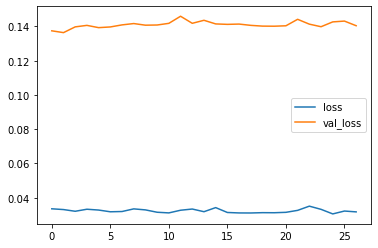

In [50]:
'''in here i will check out the model loss'''
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
'''what we can do again to try to prevent over feeding is add in drop out layer'''
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [53]:
model.fit(x=X_train,y=y_train,batch_size=128, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
4/4 [==============================] - 0s 32ms/step - loss: 0.6928 - val_loss: 0.6833
Epoch 2/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6800 - val_loss: 0.6724
Epoch 3/600
4/4 [==============================] - 0s 5ms/step - loss: 0.7001 - val_loss: 0.6623
Epoch 4/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6675 - val_loss: 0.6528
Epoch 5/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6672 - val_loss: 0.6445
Epoch 6/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6558 - val_loss: 0.6367
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6486 - val_loss: 0.6292
Epoch 8/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6303 - val_loss: 0.6222
Epoch 9/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6467 - val_loss: 0.6149
Epoch 10/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6451 - val_loss: 0.6077
Epoch 11/600
4/4 [==========

4/4 [==============================] - 0s 5ms/step - loss: 0.1418 - val_loss: 0.1382
Epoch 168/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1546 - val_loss: 0.1379
Epoch 169/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1431 - val_loss: 0.1393
Epoch 170/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1492 - val_loss: 0.1407
Epoch 171/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1622 - val_loss: 0.1403
Epoch 172/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1510 - val_loss: 0.1402
Epoch 173/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1268 - val_loss: 0.1393
Epoch 174/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1295 - val_loss: 0.1388
Epoch 175/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1094 - val_loss: 0.1386
Epoch 176/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1689 - val_loss: 0.1393
Epoch 177/600
4/4 [=====

Epoch 250/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1252 - val_loss: 0.1280
Epoch 251/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1348 - val_loss: 0.1267
Epoch 252/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1032 - val_loss: 0.1270
Epoch 253/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1055 - val_loss: 0.1275
Epoch 254/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0845 - val_loss: 0.1299
Epoch 255/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0921 - val_loss: 0.1348
Epoch 256/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0883 - val_loss: 0.1330
Epoch 257/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0844 - val_loss: 0.1281
Epoch 258/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1176 - val_loss: 0.1284
Epoch 259/600
4/4 [==============================] - 0s 5ms/step - loss: 0.1131 - val_loss: 0.1291
Epoch 260/

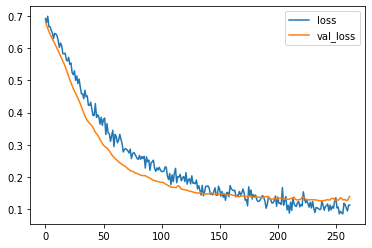

In [55]:
'''i will analyze the losses here'''
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
'''now we will do a full evaluation on our classes'''
predictions = model.predict_classes(X_test)

In [58]:
'''we will begin our predictions'''
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.97      0.96      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [61]:
print(confusion_matrix(y_test,predictions))

[[ 63   3]
 [  4 101]]
